In [1]:
# Import the tables of the data set as dataframes.
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
df_games = pd.read_csv('games_of_all_time.csv')
df_steam = pd.read_csv('steam.csv')

# Viz 1

In [105]:
a=np.array(df_games['game_name'])
b=np.array(df_steam['name'])
text = ''.join(np.concatenate((a, b), axis=0))

In [106]:
import matplotlib.pyplot as plt

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

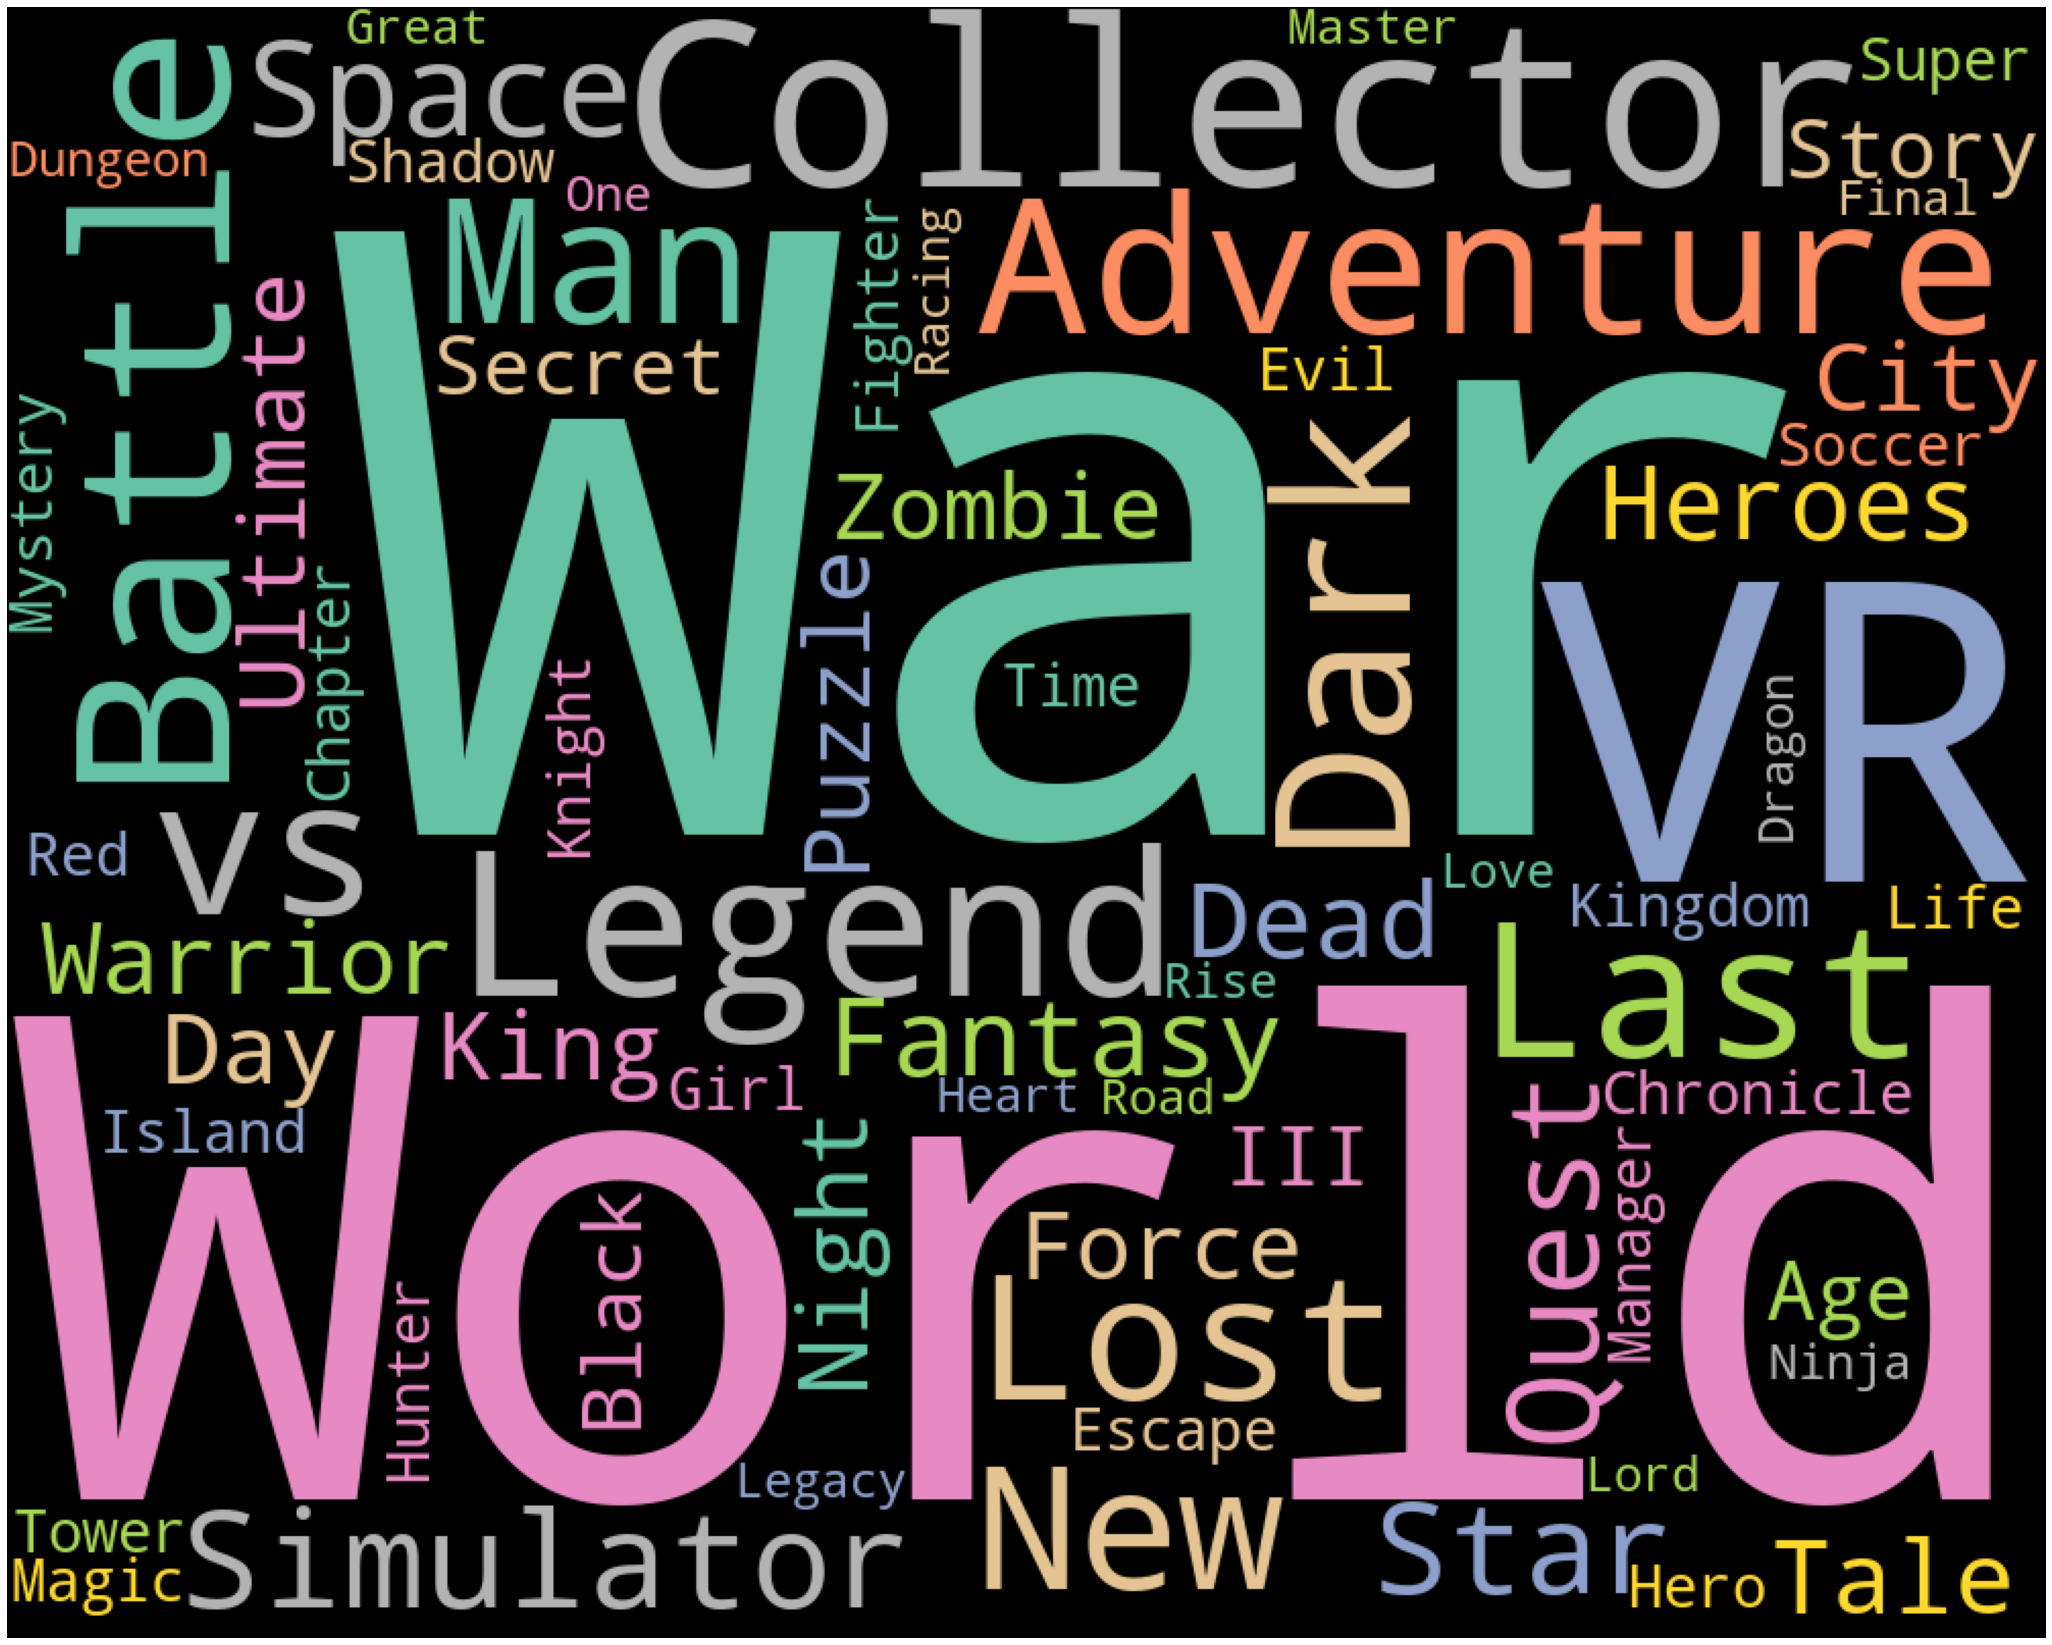

In [107]:
# Generate wordcloud
wordcloud = WordCloud(width = 1000, 
                      height = 800, 
                      random_state=1, 
                      background_color='black',
                      max_words = 70,
                      colormap='Set2', 
                      collocations=False, 
                      stopwords = STOPWORDS.union(set(['game', '>', 'I', 'II', 'Episode','Edition'] + list(string.ascii_lowercase)))).generate(text)

# Plot
plot_cloud(wordcloud)

In [108]:
wordslist = pd.DataFrame([wordcloud.words_]).T.reset_index().rename(columns = {"index":"word", 0:"freq"})

In [109]:
wordslist.head()

,word,freq
0,War,1.000000
1,World,0.686957
2,VR,0.675362
3,Collector,0.600000
4,Battle,0.504348


In [325]:
from ast import literal_eval

def add_info(df, df_games):
    for idx, word in df['word'].iteritems():
        temp = []
        for _, name in df_games['game_name'].iteritems():
            if word in name and word not in temp:
                temp.append(name)
                
        # for _, name in df_steam['name'].iteritems():
        #     if word in name:
        #         temp.append(name)
        yield temp
        

def add_genre(df, df_games):
    for idx, glist in df['game'].iteritems():
        temp_genre = []
        # print(glist.dtype)

        for game in glist:
            genre = df_games[df_games['game_name'] == game]['genre'].to_list()[0]
            
            if isinstance(genre, str):
                for g in literal_eval(genre):
                    if g not in temp_genre:
                        temp_genre.append(g)
                    
        yield temp_genre

In [333]:
wordslist['game'] = list(add_info(wordslist, df_games))
wordslist['gamecount'] = wordslist['game'].apply(lambda x: len(x))
wordslist['genre'] = list(add_genre(wordslist, df_games))
wordslist['genrecount'] = wordslist['genre'].apply(lambda x: len(x))

In [338]:
wordslist.head()

,word,freq,game,gamecount,genre,genrecount
0,War,1.000000,"[Gears of War, God of War II, Gears of War 2, ...",401,"[Action, Shooter, Third-Person, Sci-Fi, Arcade...",74
1,World,0.686957,"[Super Mario 3D World, World Soccer Winning El...",202,"[Platformer, 3D, Action, Sports, Traditional, ...",97
2,VR,0.675362,"[L.A. Noire: The VR Case Files, Five Nights at...",31,"[Adventure, 3D, First-Person, Action Adventure...",30
3,Collector,0.600000,"[The Legend of Zelda Collector's Edition, Kona...",3,"[Action Adventure, Fantasy, Miscellaneous, Com...",7
4,Battle,0.504348,"[Battlefield 2, IL-2 Sturmovik: Forgotten Batt...",155,"[Action, Shooter, First-Person, Tactical, Mode...",61


In [335]:
wordslist.isnull().any()

word          False
freq          False
game          False
gamecount     False
genre         False
genrecount    False
dtype: bool

In [339]:
wordslist.to_csv('Viz1.csv')

# Viz 2

In [358]:
# Kaggle PC Games Sales
df_sale1 = pd.read_csv("Games.csv")

In [359]:
df_sale1['Release'] = pd.to_datetime(df_sale1['Release'], format="%b-%y")
df_sale1['Release'] = df_sale1['Release'].apply(lambda x: x.strftime('%Y-%m'))
df_sale1.sort_values(by='Release', ascending=False)

,Name,Sales,Series,Release,Genre,Developer,Publisher
20,Valheim,6.0,NaN,2021-02,Survival,Iron Gate,Coffee Stain Publishing
27,Cyberpunk 2077,4.5,NaN,2020-12,Action role-playing,CD Projekt Red,CD Projekt
110,Crusader Kings III,1.0,Crusader Kings,2020-09,Grand strategy,Paradox Development Studio,Paradox Interactive
10,Fall Guys,10.0,NaN,2020-08,Battle royale,Mediatonic,Devolver Digital
139,Mordhau,1.0,NaN,2019-04,Action,Triternion,Triternion
...,...,...,...,...,...,...,...
22,Last Ninja 2,5.5,The Last Ninja,1988-08,Action-adventure,System 3,Activision
162,Tetris,1.0,Tetris,1988-01,Puzzle,Spectrum HoloByte,Spectrum HoloByte
88,International Karate,1.5,International Karate,1985-11,Fighting,System 3,Epyx
34,Where in the World Is Carmen Sandiego?,4.0,Carmen Sandiego,1985-06,Educational,Broderbund,Broderbund


In [204]:
# Video Game Sales by Genre
df_sale2 = pd.read_csv("Sales2017.csv")
df_sale2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [205]:
df_sale2 = df_sale2[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Global_Sales']]
df_sale2 = df_sale2[df_sale2.Year_of_Release <= 2016]

In [206]:
df_sale2.Global_Sales.isnull().any()

False

In [207]:
df_sale2.Year_of_Release.isnull().any()

False

In [208]:
df_sale2.Genre.isnull().any()

False

In [209]:
df_sale2[df_sale2['Year_of_Release'].isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales


In [210]:
df_sale2.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [221]:
df_grpby = pd.DataFrame(df_sale2.groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum())

In [222]:
df_grpby = df_grpby.unstack().fillna(0)
df_grpby["Total"] = df_grpby.sum(axis=1)

In [227]:
yr_list = df_grpby.index.to_list()

In [237]:
df_grpby.index.name = None
df_grpby = df_grpby.set_axis(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
                   'Strategy', 'Total'], axis=1)

In [240]:
df_grpby = df_grpby.reset_index()
df_grpby.rename(columns={'index':'year'}, inplace=True)

In [242]:
df_grpby.to_csv("Viz2.csv")

# Viz 3

In [134]:
# windows game list 1983 - 2021, select 2011 - 2021
df_win = pd.read_csv("Windows_Games_List.csv")
df_win.released.unique()

array(['1999', '2000', '2016', '2014', '1995', '2008', '2007', '1997',
       '2002', '2006', '2018', '2001', '2005', '1993', '1996', '2011',
       '2010', '2012', '1998', '2015', '2003', '2013', '2009', '2019',
       '2004', '1994', '2017', '2020', 'TBA', '2021', '1992', '1983',
       '2022', '1990'], dtype=object)

In [135]:
df_win[df_win.released == 'TBA']

,titles,released,developers,publishers,genres
699,Crab Champions,TBA,Noisestorm,Noisestorm,"Fighting, Shooter, Racing, Adventure, Indie"
824,Dead Island 2,TBA,Techland,Techland,"Shooter, Role-playing (RPG), ""Hack and slash/B..."
1836,KnightOut,TBA,2nd Studio,2nd Studio,"Strategy, Indie"
2561,Pop’n Music Lively,TBA,Konami,Konami,Music


In [136]:
# Dead Island 2 not released yet
df_win.iloc[699].released = "2020"
df_win.iloc[1836].released = "2020"
df_win.iloc[2561].released = "2020"

In [137]:
df_win = df_win.drop(df_win[df_win['released'] == 'TBA'].index)

In [138]:
df_win.genres.isnull().sum()

0

In [139]:
df_win['released'] = df_win['released'].astype(int)
df_win = df_win[df_win.released >= 2011].reset_index(drop=True)
df_win

,titles,released,developers,publishers,genres
0,140,2016,Double Fine Productions,Abstraction Games,"Music, Platform, Puzzle, Strategy, Indie"
1,1001 Spikes,2014,8bits Fanatics,Nicalis,"Platform, Adventure, Indie"
2,428: Shibuya Scramble,2018,Spike Chunsoft,Spike Chunsoft,"Adventure, Visual Novel"
3,6180 the moon,2014,PokPoong GamesTurtle Cream,Turtle Cream,"Music, Platform, Puzzle, Adventure, Indie, Arcade"
4,A Game of Thrones: Genesis,2011,Cyanide,Focus Home Interactive,"Real Time Strategy (RTS), Strategy"
...,...,...,...,...,...
426,Z,2014,The Bitmap Brothers,Virgin Interactive,"Real Time Strategy (RTS), Strategy"
427,Zero G Arena,2016,Jonathan Wood,Jonathan Wood,Indie
428,Zero Time Dilemma,2016,Spike Chunsoft,Aksys Games,"Puzzle, Role-playing (RPG), Strategy, Adventur..."
429,ZeroRanger,2018,System Erasure,System Erasure,"Shooter, Arcade"


In [140]:
df_win[df_win.developers.isnull()]

,titles,released,developers,publishers,genres


In [141]:
df_win[df_win.publishers.isnull()]

,titles,released,developers,publishers,genres
57,Black Mesa,2012,Black Mesa team,NaN,"Shooter, Platform, Puzzle"
76,Chicory: A Colorful Tale,2020,Greg Lobanov,NaN,"Role-playing (RPG), Adventure, Indie"
102,Dead Pixels,2012,CSR-Studios,NaN,Shooter
108,Defenders Quest: Valley of the Forgotten,2012,Level Up Labs,NaN,"Role-playing (RPG), Strategy, Tactical"
109,Defenders Quest: Valley of the Forgotten DX,2016,Level Up Labs,NaN,"Role-playing (RPG), Strategy, Tactical"
116,Democracy 3,2013,Positech Games,NaN,"Simulator, Strategy, Indie"
117,Democracy 4,2019,Positech Games,NaN,"Simulator, Strategy, Indie"
183,FTL: Faster Than Light,2012,Subset Games,NaN,"Simulator, Strategy, Indie"
201,Green Hell,2019,Creepy Jar,NaN,"Simulator, Strategy, Adventure, Indie"
288,Orcs Must Die!,2011,Robot Entertainment,NaN,"Tactical, ""Hack and slash/Beat em up"""


In [142]:
top_company = df_win.groupby(['publishers']).size().sort_values(ascending=False).head(10).to_dict()
list(top_company.keys())

['Electronic Arts',
 '2K Sports',
 'Ubisoft',
 'Konami',
 'EA Sports',
 'Sega',
 'Square Enix',
 'Blizzard Entertainment',
 'Microsoft Studios',
 'Milestone srl']

In [143]:
df_win[df_win['publishers'].isin(list(top_company.keys()))]

,titles,released,developers,publishers,genres
22,Anno 2070,2011,Related Designs,Ubisoft,"Real Time Strategy (RTS), Simulator, Strategy"
26,Apex Legends,2019,Respawn Entertainment,Electronic Arts,Shooter
28,Assassins Creed III,2012,Ubisoft Montreal,Ubisoft,Adventure
29,Assassins Creed IV: Black Flag,2013,Ubisoft Montreal,Ubisoft,Adventure
30,Assassins Creed Odyssey,2018,Ubisoft Quebec,Ubisoft,Adventure
...,...,...,...,...,...
417,WWE 2K16,2016,YukesVisual Concepts,2K Sports,"Simulator, Sport"
418,WWE 2K17,2017,YukesVisual Concepts,2K Sports,"Simulator, Sport"
419,WWE 2K18,2017,YukesVisual Concepts,2K Sports,"Simulator, Sport"
420,WWE 2K19,2018,YukesVisual Concepts,2K Sports,"Simulator, Sport"


In [144]:
df_win[df_win.genres.str.contains("RPG")]

,titles,released,developers,publishers,genres
7,Adventures of Pip,2015,TicToc Games,TicToc Games,"Role-playing (RPG), Adventure, Indie"
23,Anodyne,2013,Analgesic Productions,Analgesic Productions,"Platform, Role-playing (RPG), Adventure, Indie"
31,Assassins Creed Origins,2017,Ubisoft Montreal,Ubisoft,"Role-playing (RPG), Adventure"
34,Assassins Creed Valhalla,2020,Ubisoft Quebec,Ubisoft,"Role-playing (RPG), Adventure"
36,Attack on Titan 2,2018,Omega Force,Koei Tecmo,"Shooter, Role-playing (RPG)"
...,...,...,...,...,...
412,World of Warcraft: Warlords of Draenor,2014,Blizzard Entertainment,Blizzard Entertainment,"Role-playing (RPG), Strategy, Adventure"
413,World of Warcraft: Legion,2016,Blizzard Entertainment,Blizzard Entertainment,"Role-playing (RPG), Adventure"
414,World of Warcraft: Battle for Azeroth,2018,Blizzard Entertainment,Blizzard Entertainment,"Role-playing (RPG), Adventure"
415,World of Warcraft: Shadowlands,2020,Blizzard Entertainment,Blizzard Entertainment,Role-playing (RPG)


In [145]:
[x for x in df_win.iloc[0].genres.split(", ")]

['Music', 'Platform', 'Puzzle', 'Strategy', 'Indie']

In [166]:
def genres(df):
    genre_list = []  
    for idx, genres in df['genres'].iteritems():
        genre_list.extend([x for x in genres.split(", ")])
        
    (genre, counts) = np.unique(genre_list, return_counts=True)
    genre_freq = {x:y for x,y in zip(genre, counts)}
    genre_list = list(set(genre_list))

    return genre_list, genre_freq

def genres_per(df):
    genre_list = []
    genre_std = ['Adventure', 'Role-playing (RPG)', 'Shooters', 'Strategy', 'Sport', 'Simulator', 'Platform', 'Arcade', 'Puzzle', 'Racing']
    
    for idx, genres in df['genres'].iteritems():
            
        genre_list.extend([x for x in genres.split(", ") if x in genre_std])
        
    (genre, counts) = np.unique(genre_list, return_counts=True)
    genre_pre = {x:y for x,y in zip(genre, counts)}
    freq_sum = sum(genre_pre.values())
    genre_pre = {k: v / freq_sum for k, v in genre_pre.items()}
    
    genre_list = list(set(genre_list))

    return genre_list, genre_pre

In [150]:
g_list, g_freq = genres(df_win)

In [ ]:
# Adventure, RPG, Shooters, Strategy, Sport, Simulator, Platform, Arcade, Puzzle, Racing

In [167]:
g_list, g_pre = genres_per(df_win)

In [168]:
_, pre_EA = genres_per(df_win[df_win.publishers == 'Electronic Arts'])
_, pre_2K = genres_per(df_win[df_win.publishers == '2K Sports'])
_, pre_Ubi = genres_per(df_win[df_win.publishers == 'Ubisoft'])
_, pre_Ko = genres_per(df_win[df_win.publishers == 'Konami'])
_, pre_EAS = genres_per(df_win[df_win.publishers == 'EA Sports'])
_, pre_Sega = genres_per(df_win[df_win.publishers == 'Sega'])
_, pre_SE = genres_per(df_win[df_win.publishers == 'Square Enix'])
_, pre_BE = genres_per(df_win[df_win.publishers == 'Blizzard Entertainment'])
_, pre_MS = genres_per(df_win[df_win.publishers == 'Microsoft Studios'])
_, pre_Mile = genres_per(df_win[df_win.publishers == 'Milestone srl'])

In [180]:
df_out = pd.DataFrame.from_dict([pre_EA, pre_2K, pre_Ubi, pre_Ko, pre_EAS, pre_Sega, pre_SE, pre_BE, pre_MS, pre_Mile])
df_out = df_out.fillna(0)

salary_dev_avg = [132000, 123000, 103000, 108000, 108000, 101000, 70200, 85700, 132300, 30300]
position = ['United States', 'United States', 'France', 'Japan', 'United States', 'Japan', 'Japan', 'United States', 'United States', 'Italy']

df_out.insert(0, "company", list(top_company.keys()))
df_out.insert(1, "gamecount", list(top_company.values()))
df_out.insert(2, "salary", salary_dev_avg)
df_out.insert(3, "position", position)

In [182]:
df_out.to_csv("Viz3.csv")

# Viz 4

In [ ]:
# Extracted Manually

# Viz 5

# M1 EDA

In [348]:
print("Number elements in dataset: ", len(df_games))

Number elements in dataset:  8831


In [7]:
print("Number of N/A entries: ", len(df_games) - len(df_games.dropna()))

Number of N/A entries:  2898


In [8]:
#number of games per developer
print("ranking of developers per number of games released")
df_games.groupby('developer').count().sort_values(by=['game_name'], ascending=False)['game_name']

ranking of developers per number of games released


developer
Capcom                   150
Nintendo                 130
Telltale Games           104
Konami                    86
Square Enix               76
                        ... 
Investigate North Aps      1
Investigate North          1
Invader Studios            1
Interwave Studios          1
zSlide                     1
Name: game_name, Length: 2927, dtype: int64

In [9]:
#best meta score
print("ranking of developers per average meta score")
df_games.groupby('developer').mean().sort_values(by=['meta_score'], ascending=False)['meta_score']

ranking of developers per average meta score


developer
HuneX                      97.00
Monstars Inc.              95.00
MPS Labs                   94.00
NexTech                    94.00
tobyfox                    92.33
                           ...  
Versus Evil                21.00
Hammerpoint Interactive    20.00
Pure FPS                   19.00
Gravity Corporation        17.00
Art Co., Ltd.              11.00
Name: meta_score, Length: 2927, dtype: float64

In [10]:
#best user score
print("ranking of developers per average user score")
df_games.groupby('developer').mean().sort_values(by=['user_score'], ascending=False)['user_score']

ranking of developers per average user score


developer
Vanilla Ware               91.5
historia Inc               91.5
Wube Software LTD.         91.0
SimTex                     90.0
Team Cherry                90.0
                           ... 
exozet                     20.0
Big Ape Productions        19.0
Hammerpoint Interactive    17.0
Gravity Corporation        15.0
Pure FPS                   13.0
Name: user_score, Length: 2927, dtype: float64

In [11]:
print("Number of games per platform: ")
df_games['platform'].value_counts()

Number of games per platform: 


['pc']                                                                        1995
['playstation-4']                                                              607
['switch']                                                                     509
['playstation-2']                                                              488
['xbox-360']                                                                   462
                                                                              ... 
['wii-u', 'pc', 'playstation-4']                                                 1
['playstation-3', 'xbox-360', 'ds']                                              1
['pc', 'playstation-3', 'xbox-one', 'playstation-4', 'switch', 'xbox-360']       1
['playstation-3', 'xbox-360', 'ds', 'wii', 'psp']                                1
['playstation-3', 'xbox-one', 'switch', 'playstation-4']                         1
Name: platform, Length: 506, dtype: int64

In [12]:
print("Number of games per type (singleplayer/multiplayer): ")
df_games['type'].value_counts()

Number of games per type (singleplayer/multiplayer): 


singleplayer    3527
multiplayer     3200
Name: type, dtype: int64

In [13]:
print("Number of multiplayer pc exclusives:", len(df_games.loc[(df_games['platform'] =="['pc']") & (df_games['type'] == 'multiplayer')]))
print("Number of singleplayer pc exclusives:", len(df_games.loc[(df_games['platform'] =="['pc']") & (df_games['type'] == 'singleplayer')]))
print("Number of multiplayer playstation 4 exclusives:", len(df_games.loc[(df_games['platform'] =="['playstation-4']") & (df_games['type'] == 'multiplayer')]))

Number of multiplayer pc exclusives: 618
Number of singleplayer pc exclusives: 857
Number of multiplayer playstation 4 exclusives: 185


In [14]:
#preview
df_steam.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [15]:
print("Number elements in dataset: ", len(df_steam))
print("Number of N/A entries: ", len(df_steam) - len(df_steam.dropna()))

Number elements in dataset:  27075
Number of N/A entries:  0


In [16]:
#number of games per developer
print("ranking of developers per number of games released")
df_steam.groupby('developer').count().sort_values(by=['name'], ascending=False)['name']

ranking of developers per number of games released


developer
Choice of Games                             94
KOEI TECMO GAMES CO., LTD.                  72
Ripknot Systems                             62
Laush Dmitriy Sergeevich                    51
Nikita "Ghost_RUS"                          50
                                            ..
Hollowhead, Inc.                             1
Holmsario Games                              1
Hologram Software LTD.;iCandy Games Inc.     1
Holomia                                      1
수프림                                          1
Name: name, Length: 17113, dtype: int64

In [17]:
#best reviews
print("ranking of developers per average positive reviews")
df_steam.groupby('developer').mean().sort_values(by=['positive_ratings'], ascending=False)['positive_ratings']

ranking of developers per average positive reviews


developer
Valve;Hidden Path Entertainment    2644404.0
PUBG Corporation                    496184.0
OVERKILL - a Starbreeze Studio.     308657.0
Smartly Dressed Games               292574.0
Re-Logic                            255600.0
                                     ...    
Three Percent Games                      0.0
Kiwa Games                               0.0
FOREVER GAME STUDIO LTD                  0.0
The Lunatic Tilemaps                     0.0
dynamicsoulworks                         0.0
Name: positive_ratings, Length: 17113, dtype: float64

In [18]:
#most playtime
print("ranking of developers per average playtime")
df_steam.groupby('developer').mean().sort_values(by=['average_playtime'], ascending=False)['average_playtime']

ranking of developers per average playtime


developer
Manuel Pazos;Daniel Celemín                          190625.0
Sebastian Krzyszkowiak;Konrad Burandt;Paweł Radej     95242.0
Portalarium                                           54618.0
Laminar Research                                      44169.0
托更的修罗                                                 43632.0
                                                       ...   
Hyperbook Studio                                          0.0
Hypercane Studios                                         0.0
Hypergolic Games                                          0.0
Hyperion Studio Limited                                   0.0
수프림                                                       0.0
Name: average_playtime, Length: 17113, dtype: float64

In [19]:
#most played games
print("most played games:")
df_steam.sort_values(by=['average_playtime'], ascending=False)[['name','average_playtime']]

most played games:


,name,average_playtime
9201,The Abbey of Crime Extensum,190625
1478,The Banner Saga: Factions,95245
6014,The Secret of Tremendous Corporation,95242
8969,PRICE,63481
3930,Boundless,55204
...,...,...
11913,The Purge Day,0
11912,R.A.T.S. (Regulatory Astro-Topographical Stabi...,0
11911,Skill Master VR -- Learn Meditation,0
11910,Pirate Defense,0


In [20]:
#Most popular genres
print("Most popular genres: ")
df_steam.groupby('genres').count().sort_values(by=['name'], ascending=False)['name']


Most popular genres: 


genres
Action;Indie                                                        1852
Casual;Indie                                                        1482
Action;Adventure;Indie                                              1229
Adventure;Indie                                                     1170
Action;Casual;Indie                                                 1004
                                                                    ... 
Casual;Free to Play;RPG;Simulation                                     1
Casual;Free to Play;RPG;Simulation;Strategy                            1
Casual;Free to Play;Simulation;Animation & Modeling;Early Access       1
Casual;Free to Play;Simulation;Sports                                  1
Web Publishing                                                         1
Name: name, Length: 1552, dtype: int64

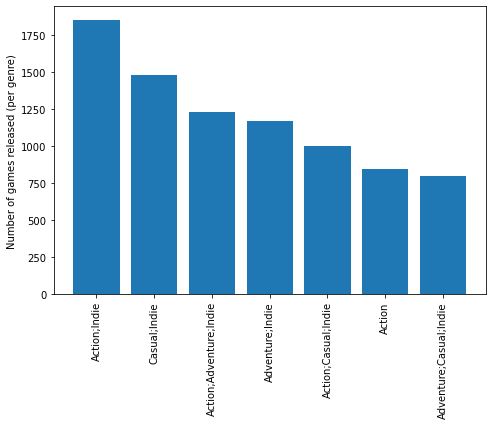

In [21]:
fig = plt.figure()
ar = np.array(df_steam.groupby('genres').count().sort_values(by=['name'], ascending=False).reset_index()[['genres','name']])
ax = fig.add_axes([0,0,1,1])
labels = ar[0:7,0]
values = ar[0:7,1]
plt.xticks(rotation = 90)
plt.ylabel("Number of games released (per genre)")
ax.bar(labels,values)
plt.show()